In [1]:
import numpy as np
from pandas import read_csv

# from average_atom.core.average_atom_new import AverageAtom as AA
from average_atom.core.aa_types import AverageAtomFactory
from average_atom.core.misc import jacobi_relaxation, sor
from average_atom.core.grids import NonUniformGrid
from average_atom.core.physics import ThomasFermi, FermiDirac

import matplotlib.pyplot as plt

from hnc.hnc.constants import *
from hnc.hnc.misc import rs_from_n, n_from_rs

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['xtick.labelsize']=14

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# Aluminum
name='Al'
Z, A = 13, 27 

ρ_solid = 2.699 #g/cc, the solid density of aluminum 
ρ = ρ_solid#8.1 # g/cc
ni_cc = ρ/(A*amu_to_AU*AU_to_g)
ni_AU = ni_cc*invcc_to_AU
rs = rs_from_n(ni_AU)

R  = 10*rs

Ti_eV = 1 
Te_eV = 1


#

Te_AU = Te_eV*eV_to_AU
Ti_AU = Ti_eV*eV_to_AU


aa_ZJ  = AverageAtomFactory.create_model("ZJ_ISModel", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=True, Npoints=1000, rmin=5e-4)
aa_ZJ_cs  = AverageAtomFactory.create_model("ZJ_CSModel", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=True, Npoints=1000, rmin=5e-4)
aa_CS  = AverageAtomFactory.create_model("TFStarret2014", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=True, Npoints=1000, rmin=5e-4)

________________________
Generating NPA
Using More TF fit for initial Zstar = 2.495
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
________________________
Generating NPA


/home/zach/plasma/average_atom/core/average_atom_new.py:284: RuntimeWarning: invalid value encountered in power
  nb_Mavrin_Demura_func = lambda r: np.nan_to_num(self.Z/(4*π*r_TF**3) * (Φ_Mavrin_Demura(x(r))/x(r) )**1.5)


Using More TF fit for initial Zstar = 2.495
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
________________________
Generating NPA
Using More TF fit for initial Zstar = 2.495
	Intializing grid
Initializing, False
________________________
Generating NPA
Using More TF fit for initial Zstar = 2.495
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized


In [3]:
aa_ZJ_cs.solve(picard_alpha=0.2,verbose=True)
aa_ZJ_cs.set_uii_eff()

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	μ = 3.745206263e-01, change: 3.036101794e-03 (converged=False)
	φe Err =  5.005e-04, φe change =  6.598e-01
	ne Err =  2.320e-02, ne change =  3.935e-05
	Q =  0.000e+00 ->  0.000e+00, 
	Zstar guess =  2.495e+00. Current Zstar:  2.498e+00 (converged=False)
	Change =  6.090e-01
__________________________________________
TF Iteration 1
	μ = 3.748222283e-01, change: 8.053015789e-04 (converged=False)
	φe Err =  5.005e-04, φe change =  3.708e-02
	ne Err =  4.865e-03, ne change =  2.769e-06
	Q =  0.000e+00 ->  0.000e+00, 
	Zstar guess =  2.495e+00. Current Zstar:  2.497e+00 (converged=False)
	Change =  3.918e-02
__________________________________________
TF Iteration 2
	μ = 3.749868474e-01, change: 4.391923722e-04 (converged=False)
	φe Err =  5.005e-04, φe change =  1.024e-02
	ne Err =  6.877e-03, ne change =  8.417e-06
	Q =  0.000e+00 ->  4.547e-13, 
	Zstar 

/home/zach/plasma/average_atom/core/average_atom_new.py:573: RuntimeWarning: invalid value encountered in divide
  rel_errs = 0.5*(np.abs(LHS - RHS)[:-1]/np.sqrt(LHS**2 + RHS**2)[:-1])


__________________________________________
TF Iteration 200
	μ = 5.617256999e-01, change: 1.699548130e-04 (converged=False)
	φe Err =  5.005e-04, φe change =  7.758e-06
	ne Err =  2.519e-05, ne change =  2.413e-09
	Q =  0.000e+00 ->  0.000e+00, 
	Zstar guess =  4.532e+00. Current Zstar:  4.533e+00 (converged=False)
	Change =  1.285e-04
__________________________________________
TF Iteration 225
	μ = 5.629843867e-01, change: 1.492489483e-03 (converged=False)
	φe Err =  5.005e-04, φe change =  5.461e-05
	ne Err =  8.023e-06, ne change =  2.794e-08
	Q = -9.095e-13 ->  0.000e+00, 
	Zstar guess =  4.546e+00. Current Zstar:  4.548e+00 (converged=False)
	Change =  1.114e-03
__________________________________________
TF Iteration 250
	μ = 5.619428236e-01, change: 6.625730190e-04 (converged=False)
	φe Err =  5.005e-04, φe change =  2.308e-06
	ne Err =  3.770e-06, ne change =  1.026e-08
	Q =  0.000e+00 -> -9.095e-13, 
	Zstar guess =  4.536e+00. Current Zstar:  4.535e+00 (converged=False)
	Change

/home/zach/plasma/average_atom/core/average_atom_new.py:524: RuntimeWarning: divide by zero encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])


	-------------------
	Solving IET.
0: Initial condition Total Error: 8.680e+02
Exiting status 0, reverting to best index so far: 5203
Final iter:5204, Total Error: 9.968e-13


In [20]:
aa_ZJ.solve(verbose=True)
aa_ZJ.set_uii_eff()

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	μ = 1.089897896e-01, change: 1.490082237e+00 (converged=False)
	φe Err =  5.005e-04, φe change =  6.969e-05
	ne Err =  4.982e-02, ne change =  1.699e-07
	Q =  0.000e+00 ->  2.865e+00, 
	Zstar guess =  2.495e+00. Current Zstar:  2.495e+00 (converged=True)
	Change =  1.338e+00
__________________________________________
TF Iteration 1
	μ = 1.089895931e-01, change: 1.802755673e-06 (converged=True)
	φe Err =  5.005e-04, φe change =  7.423e-06
	ne Err =  2.481e-02, ne change =  1.171e-05
	Q =  2.865e+00 ->  1.431e+00, 
	Zstar guess =  2.495e+00. Current Zstar:  2.495e+00 (converged=True)
	Change =  2.584e-05
__________________________________________
TF Iteration 2
	μ = 1.090808842e-01, change: 8.376132023e-04 (converged=False)
	φe Err =  5.005e-04, φe change =  6.672e-03
	ne Err =  5.162e-03, ne change =  6.793e-06
	Q =  1.431e+00 ->  1.342e+00, 
	Zstar gue

In [21]:
aa_CS.solve(verbose=True)
aa_CS.make_iet()
aa_CS.set_uii_eff()

Solving core.
Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	μ = -2.248879734e-01, change: 1.598645775e+00 (converged=False)
	φe Err =  5.005e-04, φe change =  7.460e-01
	ne Err =  6.307e-02, ne change =  9.609e-05
	Q =  0.000e+00 -> -3.487e+00, 
	Zstar guess =  2.495e+00. Current Zstar:  2.495e+00 (converged=True)
	Change =  2.087e+00
__________________________________________
TF Iteration 1
	μ = 4.551431764e-01, change: 3.023866236e+00 (converged=False)
	φe Err =  5.005e-04, φe change =  5.883e-02
	ne Err =  3.680e-02, ne change =  8.680e-05
	Q = -3.487e+00 ->  1.073e+00, 
	Zstar guess =  2.495e+00. Current Zstar:  1.248e+00 (converged=False)
	Change =  1.403e+00
__________________________________________
TF Iteration 2
	μ = 3.534264320e-01, change: 2.234829603e-01 (converged=False)
	φe Err =  5.005e-04, φe change =  1.789e-02
	ne Err =  2.821e-03, ne change =  1.717e-05
	Q =  1.073e+00 -> -1.347

/home/zach/plasma/average_atom/core/average_atom_new.py:573: RuntimeWarning: invalid value encountered in divide
  rel_errs = 0.5*(np.abs(LHS - RHS)[:-1]/np.sqrt(LHS**2 + RHS**2)[:-1])


__________________________________________
TF Iteration 43
	μ = 3.696796638e-01, change: 0.000000000e+00 (converged=True)
	φe Err =  5.005e-04, φe change =  1.859e-12
	ne Err =  1.560e-11, ne change =  2.251e-15
	Q =  2.027e-09 ->  1.384e-09, 
	Zstar guess =  2.495e+00. Current Zstar:  2.437e+00 (converged=False)
	Change =  2.061e-12
Settin up and solving empty atom
________________________
Generating NPA
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	μ = 3.696796638e-01, change: 0.000000000e+00 (converged=True)
	φe Err =  5.006e-04, φe change =  4.244e-01
	ne Err =  2.320e-01, ne change =  4.360e-01
	Q =  0.000e+00 ->  5.938e+02, 
	Zstar guess =  2.437e+00. Current Zstar:  2.437e+00 (converged=True)
	Change =  8.282e-01
__________________________________________
TF I

/home/zach/plasma/average_atom/core/average_atom_new.py:284: RuntimeWarning: invalid value encountered in power
  nb_Mavrin_Demura_func = lambda r: np.nan_to_num(self.Z/(4*π*r_TF**3) * (Φ_Mavrin_Demura(x(r))/x(r) )**1.5)


__________________________________________
TF Iteration 50
	μ = 3.696796638e-01, change: 0.000000000e+00 (converged=True)
	φe Err =  5.006e-04, φe change =  4.624e-09
	ne Err =  4.514e-09, ne change =  5.676e-09
	Q =  1.299e+01 ->  1.299e+01, 
	Zstar guess =  2.437e+00. Current Zstar:  2.437e+00 (converged=True)
	Change =  9.675e-09
__________________________________________
TF Iteration 64
	μ = 3.696796638e-01, change: 0.000000000e+00 (converged=True)
	φe Err =  5.006e-04, φe change =  4.658e-11
	ne Err =  1.592e-11, ne change =  4.319e-11
	Q =  1.299e+01 ->  1.299e+01, 
	Zstar guess =  2.437e+00. Current Zstar:  2.437e+00 (converged=True)
	Change =  5.561e-11
Check combination is neutral: 13 = 1.297e+01
	Creating Integral Equation Solver
	-------------------
	Solving IET.
0: Initial condition Total Error: 6.103e+02


/home/zach/plasma/average_atom/core/aa_types.py:128: RuntimeWarning: divide by zero encountered in log
  log_nb_data = np.where(self.core_atom.nb==0, np.log(1e-20), np.log(self.core_atom.nb) )
/home/zach/plasma/average_atom/core/aa_types.py:143: RuntimeWarning: invalid value encountered in power
  self.Uei_iet   = self.iet.FT_k_2_r(self.Uei_iet_k**self.rs**-3)


Exiting status 0, reverting to best index so far: 4964
Final iter:4965, Total Error: 9.955e-13


Error:  name 'plotting' is not defined


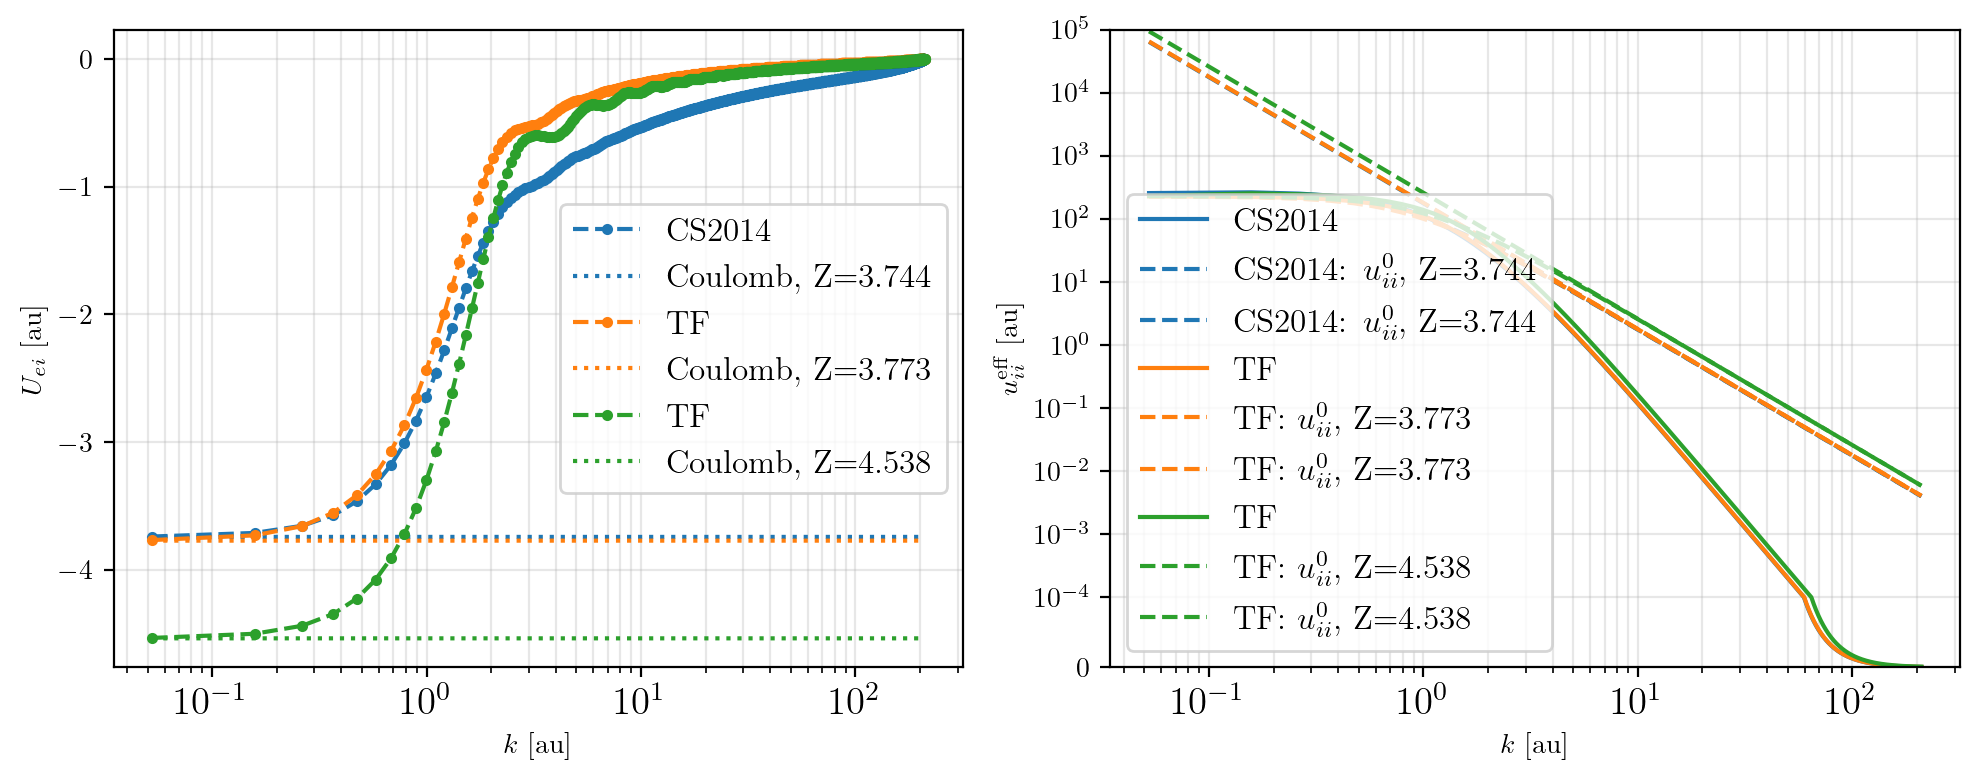

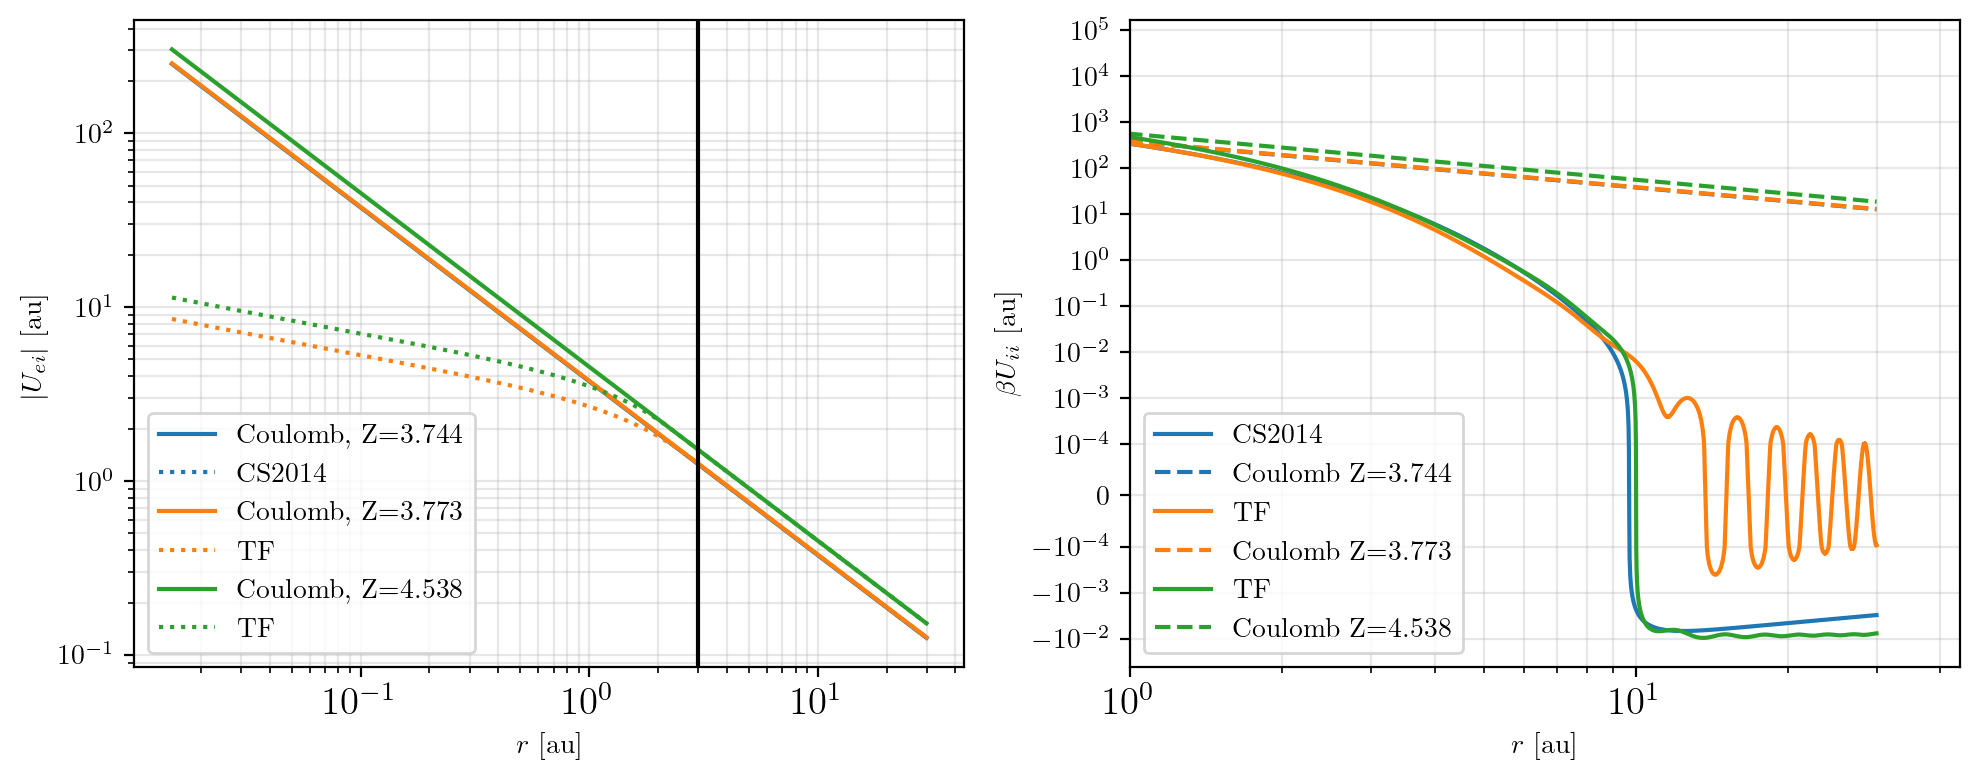

In [22]:
from importlib import reload
try:
    reload(plotting)
except NameError as e:
    from average_atom.core import plotting as plotting
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)
    
from average_atom.core.plotting import compare_aa, plot_convergence, plot_Uei, plot_Uii, plot_hii

fig, axs = plot_Uei([aa_CS, aa_ZJ, aa_ZJ_cs])
fig, axs = plot_Uii([aa_CS, aa_ZJ, aa_ZJ_cs])


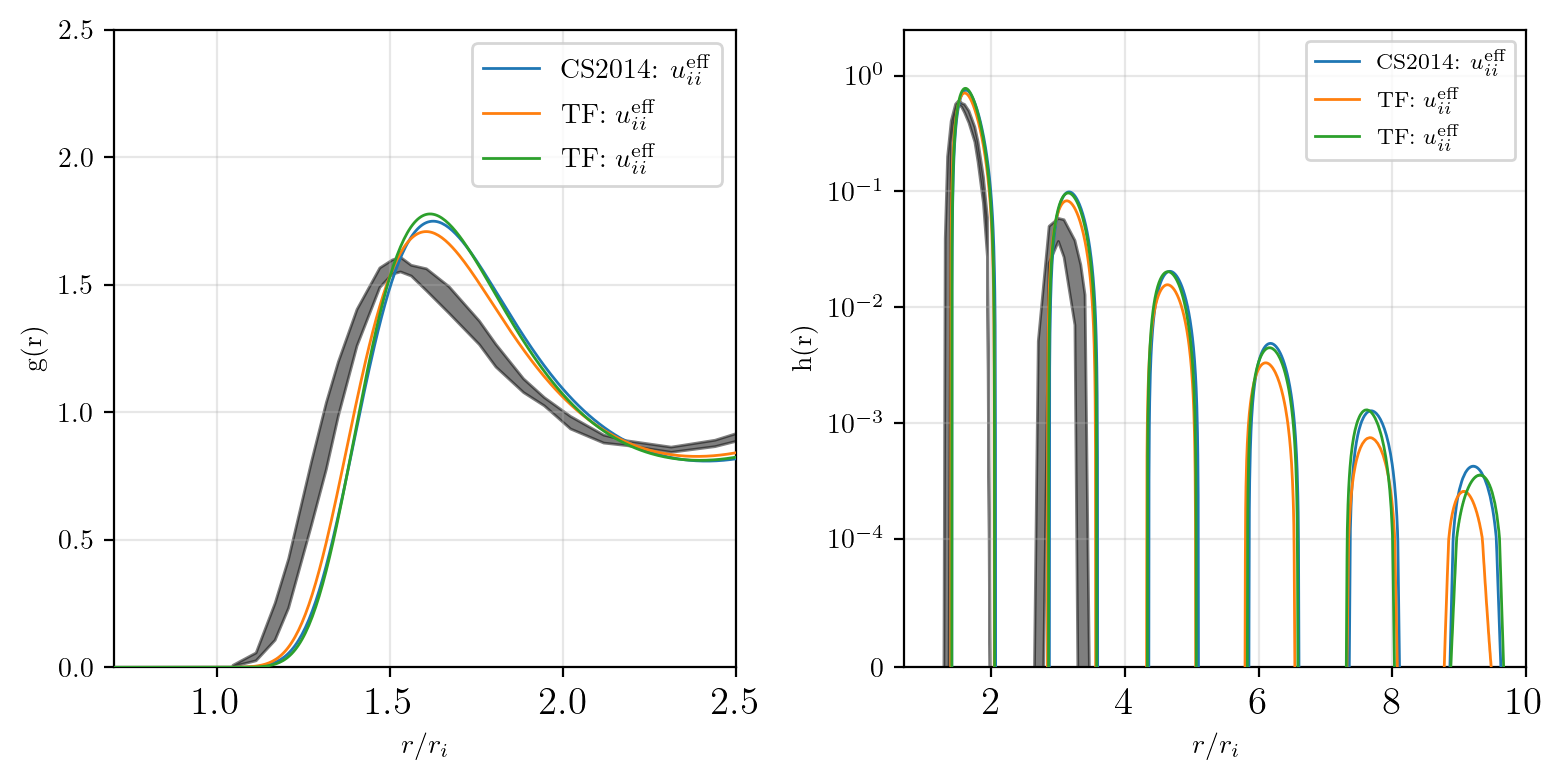

In [23]:
from scipy.interpolate import PchipInterpolator
from pandas import read_csv

fig, axs = plot_hii([aa_CS, aa_ZJ, aa_ZJ_cs])

# Data from community TCCW
upper_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Upper.txt", delim_whitespace=True, header=1)
lower_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Lower.txt", delim_whitespace=True, header=1)

ax = axs[0]
ax.fill_between(lower_data['r/ri'],lower_data['gii'], PchipInterpolator(upper_data['r/ri'], upper_data['gii'])(lower_data['r/ri']), alpha=0.5, color='k', label='Workshop DFT Spread')

ax = axs[1]
ax.fill_between(lower_data['r/ri'],lower_data['gii']-1, PchipInterpolator(upper_data['r/ri'], upper_data['gii'])(lower_data['r/ri'])-1, alpha=0.5, color='k', label='Workshop DFT Spread')


### Compare to NS

In [24]:
def column_cleaning(frame):
    frame.columns = np.roll(frame.columns, len(frame.columns)-1)
    return frame.dropna(how='all', axis=1)

def load_NS_ne_tf_data(filename, ne_type='full'):
    NS_aa = read_csv(filename, skiprows=3, delim_whitespace=True, escapechar="#")#, names=["r", "g"])
    column_cleaning(NS_aa)
    if ne_type=='full':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['nefull'])
    elif ne_type=='bound':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ion'])
    elif ne_type=='empty':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['neext'])
    elif ne_type=='free':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['nefull'])-np.array(NS_aa['ne_ion'])
    
def load_NS_ne_ks_data(filename, ne_type='full'):
    NS_aa = read_csv(filename, skiprows=4, delim_whitespace=True, escapechar="#")#, names=["r", "g"])
    column_cleaning(NS_aa)
    if ne_type=='full':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_full'])
    elif ne_type=='bound':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ion'])
    elif ne_type=='empty':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_ext'])
    elif ne_type=='free':
        return np.array(NS_aa['r(a_B)']), np.array(NS_aa['ne_full'])-np.array(NS_aa['ne_ion'])


NS_folder = "/home/zach/plasma/average_atom/data/aluminum_2T/aluminum_2T_NS/"

ne_type = 'full'

# Fixed Ti cases
NS_tf_ne11 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne11 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t1ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne12 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne12 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t3ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne13 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne13 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t10ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne14 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne14 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

# Fixed Te cases
NS_tf_ne21 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne21 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti1ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne22 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne22 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti3ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne23 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne23 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti10ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

NS_tf_ne24 = load_NS_ne_tf_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/aluminum.tfpa.dat", ne_type=ne_type)
NS_ks_ne24 = load_NS_ne_ks_data(NS_folder + "qm_ksdt_aluminum_ti30ev_t30ev_d2.7gpcc/aluminum.qmpa.dat", ne_type=ne_type)

# Mine


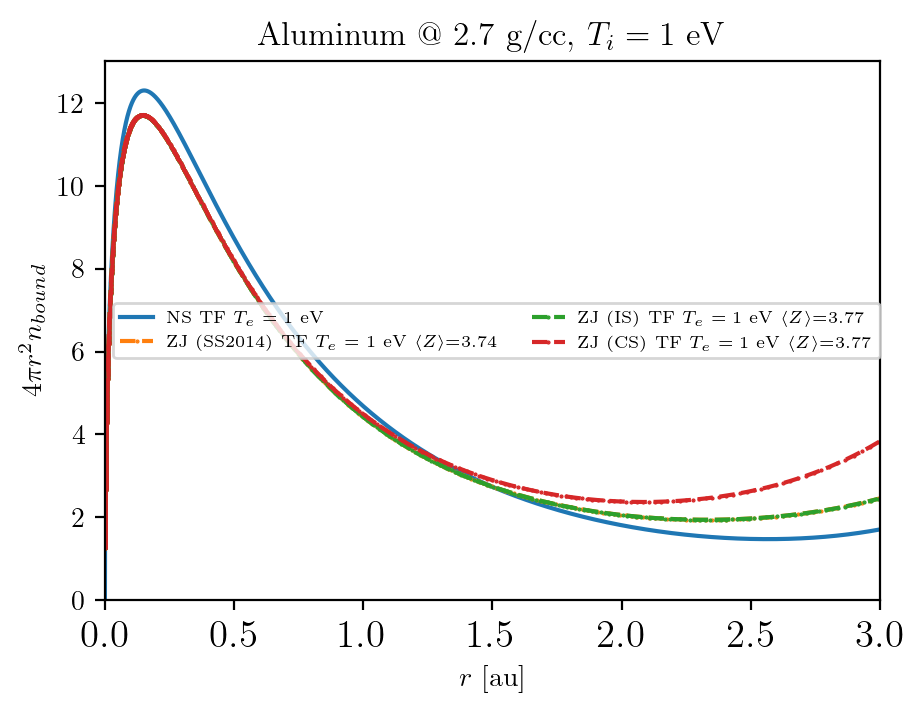

In [27]:
def plot_ne(ne_data, ks=False, figax = None, **kwargs):#line = None, color=None, label=None):
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax  = figax
    
    fourpi = True
    if fourpi==True:
        if ks==False:
            ax.plot(ne_data[0], 4*π*ne_data[0]**2*ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        else:
            ax.plot(ne_data[0], ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        ax.set_ylabel(r"$4 \pi  r^2 n_{bound}$")        
    else:
        if ks==False:
            ax.plot(ne_data[0], ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        else:
            ax.plot(ne_data[0], (4*π*ne_data[0]**2)**-1*ne_data[1], **kwargs )#, linestyle=line, color=color, label=label)
        ax.set_ylabel(r"$n_{free} $ [au]")        

    if fourpi:
        ax.set_xlim(0,3)
        ax.set_ylim(0, 13)
    else:
        ax.set_xlim(1e-2,30)
        ax.set_yscale('log')#, linthresh=1e-3)
        ax.set_xscale('log')
        ax.set_ylim(1e-3, 1e1)

    
    ax.set_xlabel(r"$r $ [au]")
    
    ax.legend(fontsize=6, ncols=2)
    
# Fixed Ti
fig, ax = plt.subplots()
ax.set_title(r"Aluminum @ $2.7$ g/cc, $T_i = 1 $ eV")

# plot_ne(NS_ks_ne11, ks=True, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS QM $T_e=1$ eV")
plot_ne(NS_tf_ne11, ks=False, figax = (fig, ax), color=color_cycle[0], linestyle='-', label=r"NS TF $T_e=1$ eV")
ZJ_csaa = np.array([aa_CS.grid.xs, aa_CS.ne_full])
ZJ_tfaa = np.array([aa_ZJ.grid.xs, aa_ZJ.ne])
ZJ_tfaa_cs = np.array([aa_ZJ_cs.grid.xs, aa_ZJ_cs.ne])
plot_ne(ZJ_csaa, ks=False, figax = (fig, ax), color=color_cycle[1], linestyle='--', marker='.', markersize=1, label=r"ZJ (SS2014) TF $T_e=1$ eV $\langle Z \rangle$={0:0.2f}".format(aa_CS.Zstar))
plot_ne(ZJ_tfaa, ks=False, figax = (fig, ax), color=color_cycle[2], linestyle='--', marker='.', markersize=1, label=r"ZJ (IS) TF $T_e=1$ eV $\langle Z \rangle$={0:0.2f}".format(aa_ZJ.Zstar))
plot_ne(ZJ_tfaa_cs, ks=False, figax = (fig, ax), color=color_cycle[3], linestyle='--', marker='.', markersize=1, label=r"ZJ (CS) TF $T_e=1$ eV $\langle Z \rangle$={0:0.2f}".format(aa_ZJ.Zstar))
# ZJ_csaa = np.array([aa_CS.core_atom.grid.xs, aa_CS.core_atom.ne])
# plot_ne(ZJ_csaa, ks=False, figax = (fig, ax), color=color_cycle[1], linestyle='--', marker='.', markersize=1, label=r"ZJ (CS2014) TF $T_e=1$ eV")

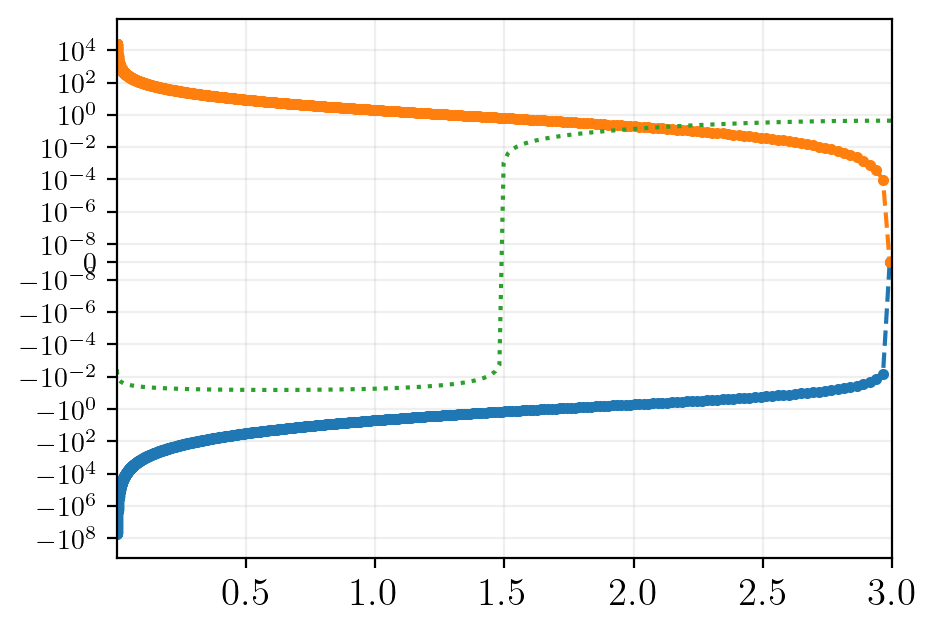

In [9]:
from scipy.interpolate import interp1d

fig, ax  = plt.subplots()

ZJ_csaa = np.array([aa_CS.grid.xs, aa_CS.ne_full])

# ax.plot(aa_CS.core_atom.grid.xs, aa_CS.grid.A_dfdx.dot(aa_CS.core_atom.φe  ), '--.')
ax.plot(aa_CS.core_atom.grid.xs, aa_CS.core_atom.grid.A_dfdx.dot(aa_CS.core_atom.φe + aa_CS.core_atom.φion ), '--.')
ax.plot(aa_CS.core_atom.grid.xs, (aa_CS.core_atom.φe + aa_CS.core_atom.φion ), '--.')
ax.plot(ZJ_csaa[0], ZJ_csaa[1]/interp1d(NS_tf_ne11[0], NS_tf_ne11[1])(ZJ_csaa[0])-1, ':')

ax.set_yscale('symlog', linthresh=1e-8)
ax.set_xlim(np.min(ZJ_csaa[0]),3)
# ax.set_xscale('log')
ax.grid(alpha=0.2)

## EOS

In [10]:
def get_E(aa):
    βVeff = aa.get_βVeff(aa.φe, aa.ne, aa.ne_bar)
    η = aa.μ/aa.Te - βVeff
    βU = aa.grid.integrate_f(βVeff*aa.ne)
    
    φ_from_e_only = aa.get_φe(-aa.ne)[0] 
    φ_from_i_only = aa.get_φe(aa.ρi)[0] + aa.φion 
    print(φ_from_e_only, φ_from_i_only)
    U = -aa.grid.integrate_f(aa.ne * (0.5*φ_from_e_only + φ_from_i_only))

    I_onehalf = FermiDirac.Ionehalf(η)
    I_threehalf = FermiDirac.Ithreehalf(η)
    
    K = (2*aa.Te)**1.5/(2*π**2) * aa.Te * aa.grid.integrate_f( I_threehalf)
    return U, K, (U + K)

def get_P(aa):
    P = (2*aa.Te)**2.5/(6*π**2) * FermiDirac.Ithreehalf(aa.μ/aa.Te)
    return P

Ee_pot, Ee_K, Ee = get_E(aa_ZJ)
P_e =  get_P(aa_ZJ)
print(f"Ee_pot = {Ee_pot:0.3e} [au], Ee_K = {Ee_K:0.3e} [au], Ee_tot = {Ee:0.3e} [au]")
print(f"P_e = {P_e:0.3e} [au], {P_e*AU_to_bar/1e6:0.3e} [Mbar]")
print(f"Virial if {Ee_K:0.3e} = {3/2*P_e*aa_ZJ.Vol - 0.5*Ee_pot:0.3e} --->  off by {100*Ee_K/(3/2*P_e*aa_ZJ.Vol - 0.5*Ee_pot) - 100:0.3e} % ")

print(f"\nβEe_pot/Z = {Ee_pot/aa_ZJ.Te/aa_ZJ.Z:0.3f}, βEe_K/Z = {Ee_K/aa_ZJ.Te/aa_ZJ.Z:0.3f}, βEe_tot/Z = {Ee/aa_ZJ.Te/aa_ZJ.Z:0.3f}")
print(f"βP_e Ω/Z = {P_e*aa_ZJ.Vol/aa_ZJ.Te/aa_ZJ.Z:0.3f}")
# print(f"Virial if {Ee_K:0.3e} = {3/2*P_e*aa_ZJ.Vol - 0.5*Ee_pot:0.3e}")

[-4.83264387e+01 -4.83263922e+01 -4.83262510e+01 -4.83260156e+01
 -4.83256864e+01 -4.83252637e+01 -4.83247480e+01 -4.83241396e+01
 -4.83234389e+01 -4.83226463e+01 -4.83217622e+01 -4.83207869e+01
 -4.83197209e+01 -4.83185643e+01 -4.83173177e+01 -4.83159813e+01
 -4.83145556e+01 -4.83130407e+01 -4.83114371e+01 -4.83097451e+01
 -4.83079651e+01 -4.83060972e+01 -4.83041419e+01 -4.83020995e+01
 -4.82999702e+01 -4.82977544e+01 -4.82954524e+01 -4.82930643e+01
 -4.82905907e+01 -4.82880316e+01 -4.82853875e+01 -4.82826585e+01
 -4.82798449e+01 -4.82769471e+01 -4.82739652e+01 -4.82708995e+01
 -4.82677503e+01 -4.82645178e+01 -4.82612023e+01 -4.82578040e+01
 -4.82543231e+01 -4.82507598e+01 -4.82471145e+01 -4.82433873e+01
 -4.82395784e+01 -4.82356881e+01 -4.82317165e+01 -4.82276639e+01
 -4.82235305e+01 -4.82193164e+01 -4.82150220e+01 -4.82106472e+01
 -4.82061925e+01 -4.82016578e+01 -4.81970435e+01 -4.81923496e+01
 -4.81875764e+01 -4.81827241e+01 -4.81777927e+01 -4.81727825e+01
 -4.81676936e+01 -4.81625

/home/zach/plasma/average_atom/core/average_atom_new.py:524: RuntimeWarning: divide by zero encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])
/home/zach/plasma/average_atom/core/average_atom_new.py:524: RuntimeWarning: invalid value encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])
